# Experiment to check the impact of PCA dimensionality reduction
PCA is applied on both, color images and gray scale images, to find the dimensionality reduction impact.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import datasets
from sklearn.decomposition import RandomizedPCA

### Reduce the original data to 2 dimensions usign Randomized PCA 
This method is just used to analyze the data in a scatter plot below.

In [2]:
pca=RandomizedPCA(n_components=2)
data=datasets.load_cifar()
X_train=pca.fit_transform(data.X_train)
y=data.y_train

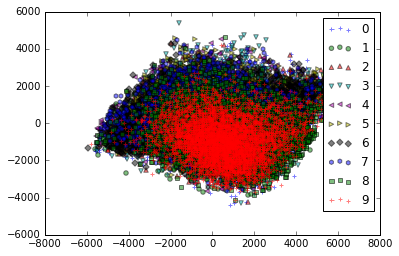

In [3]:
from itertools import cycle

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['+', 'o', '^', 'v', '<', '>', 'D', 'h', 's']
for i, c, m in zip(np.unique(y), cycle(colors), cycle(markers)):
    plt.scatter(X_train[y == i, 0], X_train[y == i, 1],
        c=c, marker=m, label=i, alpha=0.5)
    
_ = plt.legend(loc='best')

Above 2-D scatter plot shows how original raw data can be represented.

#### Analyze how PCA dimension impacts the training error on original data

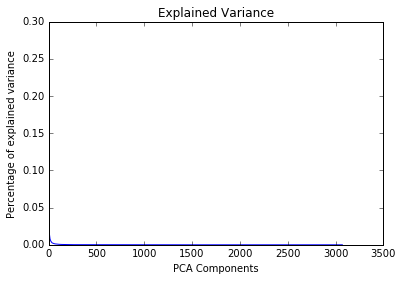

In [4]:
from sklearn.decomposition import PCA

pca_big = PCA().fit(data.X_train, y)
plt.title("Explained Variance")
plt.ylabel("Percentage of explained variance")
plt.xlabel("PCA Components")
plt.plot(pca_big.explained_variance_ratio_);

We can see that, number of dimensions >~100 have almost same train errors. We can reduce the original dataset to 100 dimensions to reduce the processing.

In [5]:
data_gray=datasets.load_cifar_gray()
X_train_gray=pca.fit_transform(data_gray.X_train)
y_gray=data.y_train

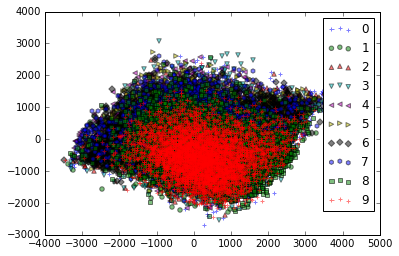

In [6]:
from itertools import cycle

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['+', 'o', '^', 'v', '<', '>', 'D', 'h', 's']
for i, c, m in zip(np.unique(y_gray), cycle(colors), cycle(markers)):
    plt.scatter(X_train_gray[y_gray == i, 0], X_train_gray[y_gray == i, 1],
        c=c, marker=m, label=i, alpha=0.5)
    
_ = plt.legend(loc='best')

This plot also looks similar to original color images plot, indicating the possibility of using gray scale data for learning.

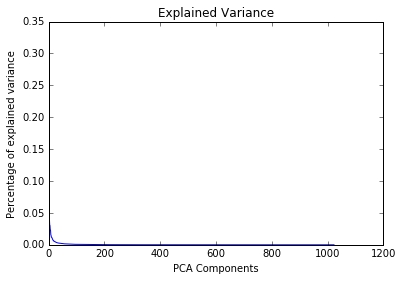

In [7]:
from sklearn.decomposition import PCA

pca_big = PCA().fit(data_gray.X_train, y_gray)
plt.title("Explained Variance")
plt.ylabel("Percentage of explained variance")
plt.xlabel("PCA Components")
plt.plot(pca_big.explained_variance_ratio_);

As shown above in color PCA dimensionality reduction, even with gray scale images, >100 dimensions give similar results on training data.